In [3]:
decoder = json.JSONDecoder()

[JSON](https://en.wikipedia.org/wiki/JSON) is a file format for storing attribute-value pairs. Let's start by looking at one line.

In [4]:
with open('ebola-tweets-short.json')as fin:
    line = fin.readline()
    print (line)
    tweet = decoder.decode(line)

{"created_at":"Thu Aug 28 15:34:30 +0000 2014","id":505015575811457024,"id_str":"505015575811457024","text":"Rebola, gatinha http:\/\/t.co\/xMxqJE5o3U","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":360002438,"id_str":"360002438","name":"jubas\u2661","screen_name":"luhantella","location":"\u266111.05.14.\u2661","url":"http:\/\/ask.fm\/httpshawol","description":"\u300c2ne1dsoshineexo\u300d are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. \u2665\ufe0e2Crazy \u2661 rua das HunHan \u00acu\u00ac\u2661 For eternity, Elli. \u2764\ufe0f Gabi \u2764\ufe0f","protected":false,"verified":false,"followers_count":802,"friends_count":1303,"listed_count":2,"favourites_count":1492,"statuses_count":44745,"created_at":"Mon

The JSON object itself is a dict of key-value pairs. 
- Values can themselves be key-value pairs, such as `tweet['user']`
- Empty values are written `[]`

In [5]:
print(tweet.keys())

dict_keys(['truncated', 'timestamp_ms', 'in_reply_to_status_id', 'retweeted', 'created_at', 'extended_entities', 'text', 'entities', 'source', 'coordinates', 'retweet_count', 'possibly_sensitive', 'id_str', 'in_reply_to_screen_name', 'user', 'id', 'favorited', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'contributors', 'place', 'lang', 'favorite_count', 'filter_level', 'in_reply_to_user_id_str', 'geo'])


`user` is a nested JSON object, which is itself a list of key-value pairs.

In [6]:
tweet['user']

{'contributors_enabled': False,
 'created_at': 'Mon Aug 22 14:46:00 +0000 2011',
 'default_profile': False,
 'default_profile_image': False,
 'description': "「2ne1dsoshineexo」 are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. ♥︎2Crazy ♡ rua das HunHan ¬u¬♡ For eternity, Elli. ❤️ Gabi ❤️",
 'favourites_count': 1492,
 'follow_request_sent': None,
 'followers_count': 802,
 'following': None,
 'friends_count': 1303,
 'geo_enabled': False,
 'id': 360002438,
 'id_str': '360002438',
 'is_translator': False,
 'lang': 'pt',
 'listed_count': 2,
 'location': '♡11.05.14.♡',
 'name': 'jubas♡',
 'notifications': None,
 'profile_background_color': 'FFFFFF',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/p

# Degree distributions

Let's collect the degree distribution for `followers_count` and `friends_count` (the number of people that a Twitter user follows).

In [7]:
filename = 'ebola-tweets-short.json'

In [8]:
# gather all tweet user variables, using a list comprehension
with open(filename) as fin:
    tweets = [decoder.decode(line) for line in fin.readlines()]
    tweet_users = [t['user'] for t in tweets]
    # get unique users
    unique_users = []
    unique_user_ids = set()
    for u in tweet_users:
        if(u['id'] not in unique_user_ids):
            unique_user_ids.add(u['id'])
            unique_users.append(u)
    print('%d total users, %d unique users'%(len(tweet_users), len(unique_users)))
    tweet_users_unique = unique_users

1000 total users, 861 unique users


**About list comprehensions** 

List comprehensions are an idiom inspired by functional programming. 
They are concise and easy to read, once you get the idea. 
Here are some readings about list comprehensions:

- http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/
- https://docs.python.org/3/howto/functional.html

Anyway, let's plot histograms of the number of followers and "friends" for each user.

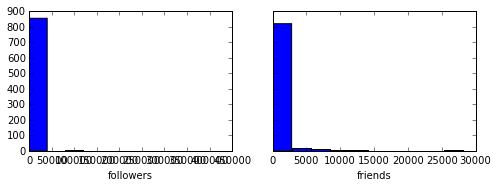

In [35]:
# two side-by-side plots
fig,ax = plt.subplots(1,2,figsize=[8,2.5],sharey=True)
# ax[0] selects the first subplot
# here we use another list comprehension to build a list of followers_count for each user
ax[0].hist([user['followers_count'] for user in tweet_users_unique]);
ax[0].set_xlabel('followers')
# ax[1] selects the second subplot. same list comprehension trick.
ax[1].hist([user['friends_count'] for user in tweet_users_unique]);
ax[1].set_xlabel('friends');

These histograms are not helpful! Let's try logs.

ValueError: range parameter must be finite.

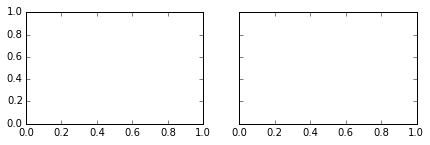

In [36]:
fig,ax = plt.subplots(1,2,figsize=[7,2],sharey=True)
ax[0].hist(np.log([user['followers_count'] for user in tweet_users_unique]));
ax[0].set_xlabel('log followers')
ax[1].hist(np.log([user['friends_count'] for user in tweet_users_unique]));
ax[1].set_xlabel('log friends');

Not a great error message! The issue is that some of these counts are zero, so we can't take a log. 

We'll just do a hacky solution: $\log(n + 1)$

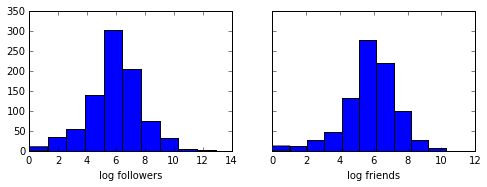

In [37]:
fig,ax = plt.subplots(1,2,figsize=[8,2.5],sharey=True)
ax[0].hist(np.log(1.+np.array([user['followers_count'] for user in tweet_users_unique])));
ax[0].set_xlabel('log followers')
ax[1].hist(np.log(1.+np.array([user['friends_count'] for user in tweet_users_unique])));
ax[1].set_xlabel('log friends');

In [38]:
foll_arr = np.array([user['followers_count'] for user in tweet_users_unique])
friend_arr = np.array([user['friends_count'] for user in tweet_users_unique])

A log-log plot can also be useful for understanding this kind of data.

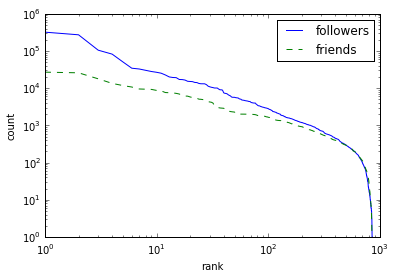

In [21]:
plt.loglog(sorted(foll_arr)[::-1]);
plt.loglog(sorted(friend_arr)[::-1],linestyle='--');
plt.legend(['followers','friends'])
plt.xlabel('rank')
plt.ylabel('count');

## Your turn

The `user.statuses_count` variable is the total number of tweets. Plot the histogram of the log of this variable, and add the variable to the figure above.

Based on your analysis, make a qualitative statement about the difference between the distribution over `statuses_count` and the other two variables.

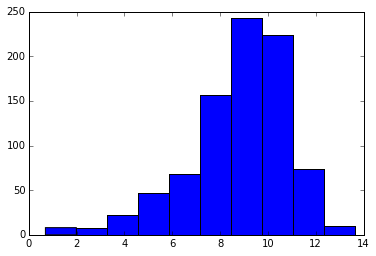

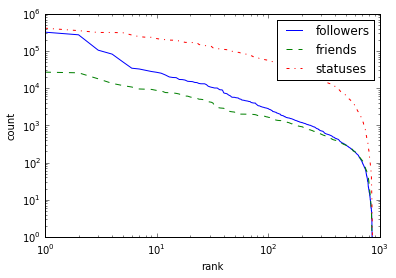

In [39]:
# your code here
status_arr = np.array([user['statuses_count'] for user in tweet_users_unique])
log_statuses = np.log(status_arr + 1)
# histogram
plt.hist(log_statuses)
plt.show()
# add to follower/friend plot
plt.loglog(sorted(foll_arr)[::-1]);
plt.loglog(sorted(friend_arr)[::-1],linestyle='--');
plt.loglog(sorted(status_arr)[::-1], linestyle='-.')
plt.legend(['followers','friends','statuses'])
plt.xlabel('rank')
plt.ylabel('count');

Every user's status count is higher than their follower count, which suggests that users post more frequently than they acquire followers. This difference is exacerbated for lower-ranked users and implies that these lower-ranked users care more about sharing statuses than acquiring followers.

## Your turn (again)

The field `lang` is the language associated with the user account.

- What fraction of tweets are by users for whom the language is English? (the value will be `en`)
- What is the second-most popular language?

In [25]:
from collections import Counter
print(Counter(['a','a','a','b','b','c','d']).most_common(2))

[('a', 3), ('b', 2)]


In [29]:
language_counts = Counter([t['user']['lang'] for t in tweets])
english_fraction = language_counts['en'] / len(tweets) * 100
print('English fraction: %.3f%%'%(english_fraction))
second_most_popular = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)[1]
print('second most popular language: %s (N=%d)'%(second_most_popular[0], second_most_popular[1]))

English fraction: 42.900%
second most popular language: pt (N=241)


**Result**

42.9% of the tweets are written by English speakers, and the second most popular language is Portuguese (`pt`).

# Putting it in a dataframe

In [30]:
import pandas as pd

In [40]:
df = pd.DataFrame({
        # this is a unique id per user
        'id':np.array([user['id'] for user in tweet_users]),
        'followers':np.array([user['followers_count'] for user in tweet_users]),
        'friends':np.array([user['friends_count'] for user in tweet_users])})

In [41]:
df.head(3)

,followers,friends,id
0,802,1303,360002438
1,587,953,57416517
2,251,244,1373051762


Are there any duplicate users in this list? 

We can tell by looking at the id.

In [42]:
print(len(df['id'].unique()),len(df))

861 1000


There are only 861 unique user IDs among these 1000 tweets. 

Let's aggregate by taking the max number of followers and friends for each ID

In [43]:
df_agg = df.groupby('id').aggregate('max')

In [44]:
df_agg.head()

,followers,friends
id,,
3078921,328,0
5678532,723,696
8706922,6166,323
8886812,13117,980
12003092,3979,1036


The `id` has been made the index of this aggregated dataframe.

In [45]:
print(len(df_agg))

861


Any relationship between number of friends and followers?

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


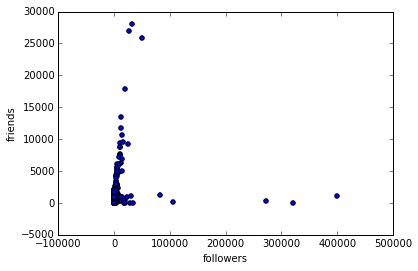

In [46]:
plt.scatter(df_agg['followers'],df_agg['friends']);
plt.xlabel('followers')
plt.ylabel('friends');

Hard to tell. Let's try logs again.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


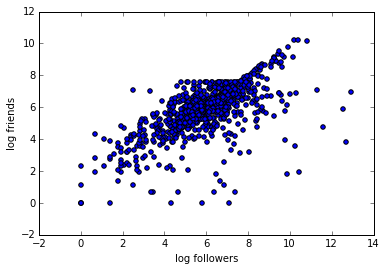

In [47]:
plt.scatter(np.log(1.+df_agg['followers']),
            np.log(1.+df_agg['friends']))
plt.xlabel('log followers')
plt.ylabel('log friends');

Looks like there is some kind of relationship. Let's get a correlation.

In [48]:
import scipy as sp
import scipy.stats as stats

In [49]:
stats.pearsonr(np.log(1.+df_agg['followers']),np.log(1.+df_agg['friends']))

(0.65466624108458016, 1.6901011201515013e-106)

The second number is the $p$-value, which is very small.

Let's confirm that the correlation is equal to $\frac{\text{cov}(x,y)}{\text{std}(x)\times \text{std}(y)}$, as discussed in class.

In [50]:
x = np.log(1. + df_agg['followers'])
y = np.log(1. + df_agg['friends'])

In [51]:
cov_xy = sum((x - x.mean()) * (y - y.mean())) / (len(x)-1)

In [52]:
print(cov_xy,x.std(),y.std())

1.8693869484 1.83175831828 1.5588742648


In [53]:
r_manual = cov_xy / (x.std() * y.std())

In [54]:
print(r_manual)

0.654666241085


Same!

For reference, here's the Spearman rank correlation

In [55]:
stats.spearmanr(np.log(1.+df_agg['followers']),np.log(1.+df_agg['friends']))

SpearmanrResult(correlation=0.67183664842944169, pvalue=4.2597680950819419e-114)

## Your turn

What is the Pearson correlation between the (log) number of `friends` and the (log) `statuses_count`? 

To answer this, add `statuses_count` to the dataframe. You'll need to start over with `df`, and then aggregate again by `id`.

          followers   friends  statuses_count
id                                           
3078921    5.796058  0.000000       10.598583
5678532    6.584791  6.546785       11.315584
8706922    8.726968  5.780744       10.606536
8886812    9.481741  6.888572        8.727940
12003092   8.289037  6.944087       11.609008


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


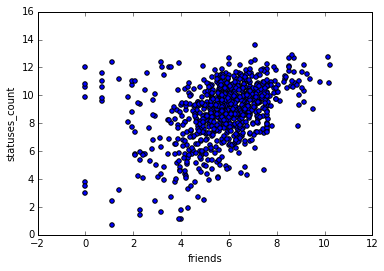

R(friends, statuses_count)=0.420 (p=4.587E-38)


In [62]:
# your code here
df = pd.DataFrame(
    {
        # this is a unique id per user
        'id':np.array([user['id'] for user in tweet_users]),
        'followers':np.array([user['followers_count'] for user in tweet_users]),
        'friends':np.array([user['friends_count'] for user in tweet_users]), 
        'statuses_count':np.array([user['statuses_count'] for user in tweet_users])
    }
                 )
df_agg = df.groupby('id').aggregate(max)
# log-values
df_agg = df_agg.applymap(lambda x: np.log(1. + x))
print(df_agg.head())
var_1_name = 'friends'
var_2_name = 'statuses_count'
# plot first
plt.scatter(df_agg.loc[:, var_1_name], df_agg.loc[:, var_2_name])
plt.xlabel(var_1_name)
plt.ylabel(var_2_name)
plt.show()
# then do correlation
r, pval = stats.pearsonr(df_agg.loc[:, var_1_name], df_agg.loc[:, var_2_name])
print('R(%s, %s)=%.3f (p=%.3E)'%(var_1_name, var_2_name, r, pval))

**Result**

There is a weak positive correlation between friends and status count. This makese sense if you consider that extroverted people are more likely to have more friends and communicate more.

# Hypothesis test: English --> more followers

English is the most popular language on Twitter, so perhaps it offers more followers.

Let's do a hypothesis test comparing the number of followers for English-speaking accounts to the number of followers for all other accounts. Specifically, we'll test the hypothesis:

    - H1: The median English-speaking twitter user has more followers than the median non-English-speaking twitter user

In [64]:
# here's a dataframe that includes whether the user's language is English
df = pd.DataFrame({'id':np.array([user['id'] for user in tweet_users]),
                   'followers':np.array([user['followers_count'] for user in tweet_users]),
                   'friends':np.array([user['friends_count'] for user in tweet_users]),
                   'statuses':np.array([user['statuses_count'] for user in tweet_users]),
                   'lang_en':[user['lang']=='en' for user in tweet_users]})

In [65]:
df.head(3)

,followers,friends,id,lang_en,statuses
0,802,1303,360002438,False,44745
1,587,953,57416517,True,44148
2,251,244,1373051762,True,8420


In [66]:
# again, aggregate by id to avoid repetition
df_agg = df.groupby('id').aggregate('max')

In [67]:
df_agg.head(3)

,followers,friends,lang_en,statuses
id,,,,
3078921,328,0,True,40077
5678532,723,696,False,82090
8706922,6166,323,True,40397


In [68]:
# print the medians
# as in lab 1, we use `loc` to select a subset of the dataframe
print(df_agg.loc[df_agg['lang_en']].median())
print(df_agg.loc[~df_agg['lang_en']].median())

followers     417
friends       344
lang_en         1
statuses     8420
dtype: float64
followers     399.0
friends       380.0
lang_en         0.0
statuses     9931.5
dtype: float64


The medians are very close, but the English speakers do have a higher median number of followers:

In [69]:
follow_series = df_agg['followers'] # for convenience
h1_val = follow_series[df_agg['lang_en'].values].median() - follow_series[~df_agg['lang_en'].values].median()
print(h1_val)

18.0


Let's do the hypothesis test by randomization. Here's a command to shuffle the series. Execute the cell multiple times to see what happens.

In [71]:
follow_series.sample(frac=1,replace=False).reset_index(drop=True).head()

0     415
1    1042
2     821
3      44
4     317
Name: followers, dtype: int64

Now let's compute the difference in medians for a shuffled sample.

In [72]:
samp = follow_series.sample(frac=1,replace=False).reset_index(drop=True)
h0_val = samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
print(h0_val)

61.0


To get a $p$-value, let's draw 1000 samples like this, and see how many exceed the h1_val

In [73]:
S = 1000

In [95]:
import timeit
time_results_1 = timeit.timeit(lambda : follow_series.sample(frac=1,replace=False).reset_index(drop=True), number=100)
print(time_results_1)
time_results_2 = timeit.timeit(lambda : follow_series[np.random.choice(follow_series.index, len(follow_series)).tolist()], number=100)
print(time_results_2)

0.6581731401383877
0.14521950390189886


In [99]:
# boring for-loop way
p_count = 0
for _ in range(S):
#     samp = follow_series.sample(frac=1,replace=False).reset_index(drop=True)
    samp = follow_series[np.random.choice(follow_series.index, len(follow_series)).tolist()]
    h0_val = samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
    p_count += (h0_val > h1_val)
print('p = %f'%(p_count / S))

p = 0.351000


In [112]:
# awesome functional programming way
median_diff = lambda samp : samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
get_samp = lambda : follow_series.sample(frac=1,replace=False).reset_index(drop=True)
# get_samp = lambda : follow_series[np.random.choice(follow_series.index, len(follow_series)).tolist()]
h0_vals = [median_diff(get_samp()) for _ in range(S)]
p_count = sum([h0_val > h1_val for h0_val in h0_vals])
print('p = %f'%(p_count / S))

p = 0.394000


Here's a figure that makes the point that the result is not statistically significant.

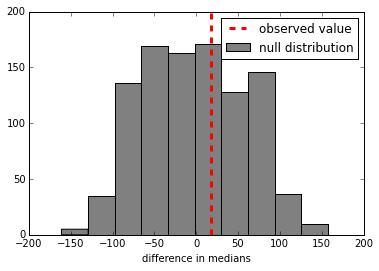

In [113]:
plt.hist(h0_vals,color='gray');
plt.plot([h1_val,h1_val],[0,200],linestyle='--',color='red',linewidth=3)
plt.xlabel('difference in medians');
plt.legend(['observed value','null distribution']);

## You try

Try running the $p$-value function a few times to get a sense for the variance of the estimation of the $p$-value.

Try three different values of $S \in \{100, 1000, 10000\}$. 

The variance of the $p$-value across, say, five runs, should decrease with larger values of $S$.

In [116]:
# your code here
S = [100, 1000, 10000]
for s in S:
    h0_vals = [median_diff(get_samp()) for _ in range(s)]
    p_list = np.array([h0_val > h1_val for h0_val in h0_vals])
    p_count_mean = p_list.mean()
    p_count_std = p_list.std()
    print('S=%d, p = %.3f +/- %.3f'%(s, p_count_mean, p_count_std))

S=100, p = 0.450 +/- 0.497
S=1000, p = 0.398 +/- 0.489
S=10000, p = 0.409 +/- 0.492


## You try

Above we saw that the median number of statuses for non-English speakers is higher than the number for English speakers. Run the same significance test on this median difference.

In [124]:
# your code here
status_series = df_agg['statuses']
h1_val = status_series[~df_agg['lang_en'].values].median() - status_series[df_agg['lang_en'].values].median()
print('H1 val=%d'%(h1_val))
# sample and shuffle
S = 10000
median_diff = lambda samp : samp[~df_agg['lang_en'].values].median() - samp[df_agg['lang_en'].values].median()
get_samp = lambda : follow_series.sample(frac=1,replace=False).reset_index(drop=True)
h0_vals = [median_diff(get_samp()) for _ in range(S)]
p_list = np.array([h0_val > h1_val for h0_val in h0_vals])
p_count_mean = p_list.mean()
print('H0 p-value = %.3E'%(p_count_mean))

H1 val=1511
H0 p-value = 0.000E+00


**Result**

Non-English speakers post a significantly higher median number of status than English speakers.

# Next steps

It looks like this comparison between median number of followers is not statistically significant -- we cannot reject the null hypothesis that the medians between the two groups (english, non-english) are the same.

However, the median number of status messages for the non-English speakers *is* higher. Furthermore, the number of statuses is positively correlated with the number of followers. Perhaps it is still the case that for a given number of statuses, the English-speaking Twitter user might have more followers. How would you compare the number of followers while **controlling** for the number of statuses?

Another direction would be to look at the tweets themselves, and their text. These tweets were gathered during the Ebola crisis, and contain keywords related to the situation. If you'd like to go further and submit this lab for credit, you can also ask me for more tweets like this. 

### Hypothesis

H0: Controlling for the number of statuses, English speakers have the same number of followers as non-English speakers.

H1: Controlling for the number of statuses, English speakers have significantly more followers than non-English speakers.

**Preprocessing:**

Let's convert the status and follower counts to log counts, since we've seen before that they are skewed.

In [185]:
df_agg_log = df_agg.copy()
df_agg_log['followers'] = np.log(df_agg_log['followers'] + 1)
df_agg_log['statuses'] = np.log(df_agg_log['statuses'] + 1)

**Approach 0: Visual analysis**

We can split the data by status quantile, then compare the difference in followers between English and non-English speakers.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


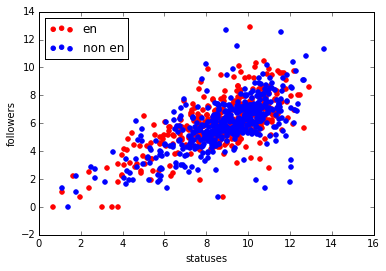

In [193]:
df_en = df_agg_log[df_agg_log['lang_en']]
df_non_en = df_agg_log[~df_agg_log['lang_en']]
plt.scatter(df_en['statuses'], df_en['followers'], color='r', label='en')
plt.scatter(df_non_en['statuses'], df_non_en['followers'], color='b', label='non en')
plt.legend(loc='upper left')
plt.xlabel('statuses')
plt.ylabel('followers')
plt.show()

It looks like the English speakers have a slightly higher follower count, but no clear separation between the groups. Let's try to break it down even further by splitting the data according to status.

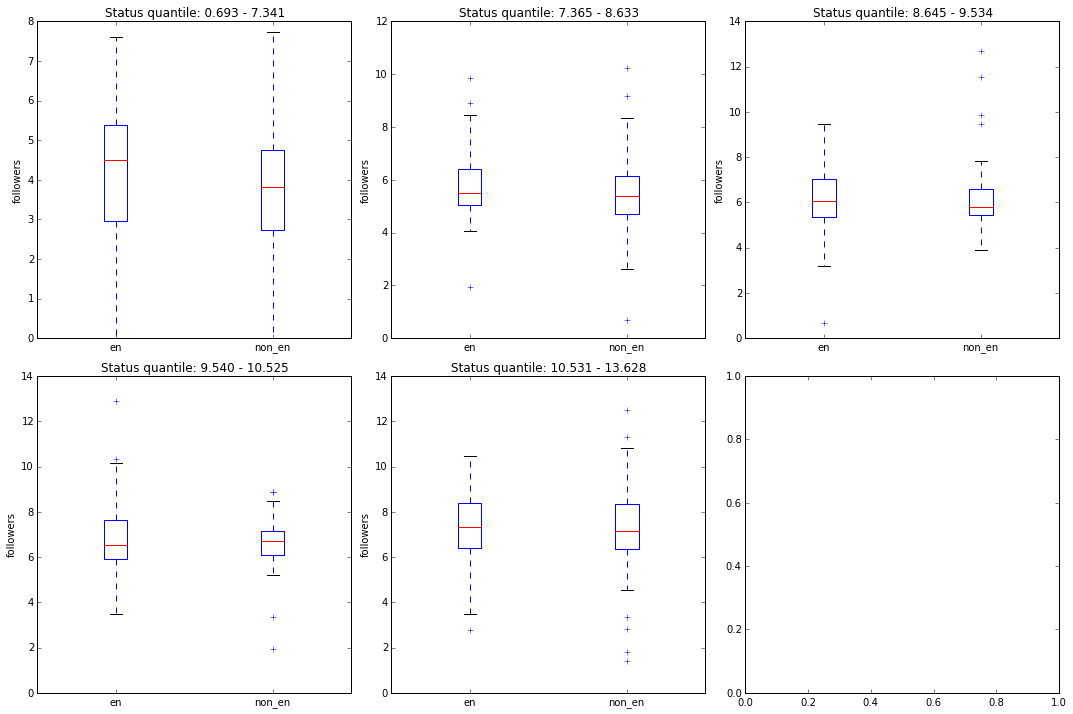

In [226]:
Q = 5
status_quantiles = pd.qcut(df_agg_log['statuses'], q=Q, labels=False)
df_agg_log.loc[:, 'status_quantile'] = status_quantiles
cols = 3
rows = int(Q / cols) + 1
width = 5
height = 5
f, axs = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(width*cols, height*rows))
for q in range(Q):
    r = int(q / cols)
    c = q % cols
    ax = axs[r, c]
    df_q = df_agg_log[df_agg_log['status_quantile'] == q]
    lower = df_q['statuses'].min()
    upper = df_q['statuses'].max()
    df_q_en = df_q[df_q['lang_en']]
    df_q_non_en = df_q[~df_q['lang_en']]
    box_data = [df_q_en['followers'], df_q_non_en['followers']]
    ax.boxplot(box_data, positions=[0, 1])
    ax.set_xticklabels(['en', 'non_en'])
    ax.set_title('Status quantile: %.3f - %.3f'%(lower, upper))
    ax.set_ylabel('followers')
plt.tight_layout()
plt.show()

It looks like across every quantile (except $9.54-10.53$) that the English speakers have slightly more followers.

**Result**

The English speakers have a slightly higher follower count when controlling for status count.

**Approach 1: Matching**

One way to compare the number of followers between non-English and English speakers would be to match each English speaker with a non-English speaker based on number of statuses, then compare the follower counts between the two groups. 

Formally, we say that the English speakers are *treated* and the non-English speakers are non-treated or *control*. The *covariate* to match across groups is the number of statuses, and the *effect* is the difference in number of followers. We can estimate the effect size of the treatment by matching each treated unit with a control unit to minimize the difference in covariates between the groups.

The only causal inference package for Python I can find is [this one](causalinferenceinpython.org), so let's give it a try!

In [236]:
from causalinference import CausalModel
df_agg_log['lang_en_int'] = df_agg_log['lang_en'].astype(int)
Y = df_agg_log['followers'].values
D = df_agg_log['lang_en_int'].values
X = df_agg_log['statuses'].values
causal = CausalModel(Y, D, X)
print(causal.summary_stats)
causal.est_via_matching()
print(causal.estimates)


Summary Statistics

                       Controls (N_c=466)         Treated (N_t=395)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        5.897        1.814        5.995        1.854        0.098

                       Controls (N_c=466)         Treated (N_t=395)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        8.907        2.012        8.668        2.126       -0.115


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.189      0.149      1.274      0.203     -0.102      0.481
           ATC      0.214      0.162      1.323

Looks like the results aren't too conclusive: the average treatment effect (`ATE`) is positive but so is the average effect on the controls (`ATC`), and none of the effects are significant. This may indicate that the matching was ineffective.

There are a few other causal inference methods, such as testing via OLS and propensity score matching.

In [187]:
causal.reset()
causal.est_via_ols()
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.241      0.092      2.618      0.009      0.061      0.422
           ATC      0.241      0.093      2.587      0.010      0.058      0.423
           ATT      0.242      0.091      2.645      0.008      0.063      0.420



In [231]:
causal.reset()
causal.est_propensity_s()
print(causal.propensity)
# try trimming the units with lower propensity scores
causal.trim()
print(causal.summary_stats)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept      0.325      0.299      1.086      0.277     -0.262      0.912
            X0     -0.056      0.033     -1.682      0.093     -0.121      0.009


Summary Statistics

                       Controls (N_c=466)         Treated (N_t=395)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        5.897        1.814        5.995        1.854        0.098

                       Controls (N_c=466)         Treated (N_t=395)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        8.907        2.012  

**Results from Approach 1**

Matching-based causal inference suggests a weak difference between English and non-English speakers in terms of follower count, after controlling for status count.

**Approach 2: Linear regression**

Use both English/non-English language and status count as covariates in an OLS regression and use the coefficient $\beta$ for language predictor to estimate the effect size of language status on follower count.

In [237]:
from statsmodels.regression.linear_model import OLS
Y = df_agg_log['followers']
X = df_agg_log.loc[:, ['lang_en_int', 'statuses']].astype(int)
model = OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     8327.
Date:                Mon, 04 Sep 2017   Prob (F-statistic):               0.00
Time:                        17:17:13   Log-Likelihood:                -1497.2
No. Observations:                 861   AIC:                             2998.
Df Residuals:                     859   BIC:                             3008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
lang_en_int     0.3727      0.091      4.102      

A weak positive effect of language on follower count! Let's see if there's an interaction between language and statuses.

In [238]:
formula = 'followers ~ lang_en_int + statuses + lang_en_int*statuses'
model = OLS.from_formula(formula, df_agg_log)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     242.0
Date:                Mon, 04 Sep 2017   Prob (F-statistic):          1.03e-113
Time:                        17:17:16   Log-Likelihood:                -1478.2
No. Observations:                 861   AIC:                             2964.
Df Residuals:                     857   BIC:                             2983.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.5348 

Interesting! We find that including an interaction between language and statuses makes both the interaction and language insignificant. This may be due to the interaction conveying the same information as language alone, resulting in the variables cancelling one another out.

**Approach 3: Ratio of followers/statuses**

In addition to causal inference and regression, we can also control for the correlation between followers and statuses by computing the ratio between the two, then comparing the distribution of ratios in the English and non-English group.

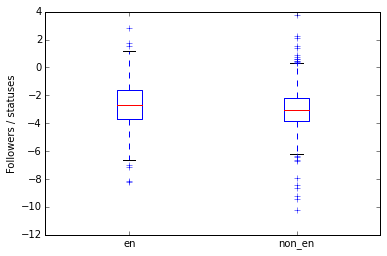

In [241]:
df_agg_log['followers_statuses'] = df_agg_log['followers'] - df_agg_log['statuses']
df_en = df_agg_log[df_agg_log['lang_en']]
df_non_en = df_agg_log[~df_agg_log['lang_en']]
box_data = [df_en['followers_statuses'], df_non_en['followers_statuses']]
plt.boxplot(box_data)
plt.xticks([1,2], ['en', 'non_en'])
plt.ylabel('Followers / statuses')
plt.show()

Cool! It looks like English speakers have a slightly higher ratio of followers to statuses than the non-English speakers. 

Is the difference between the groups' medians significant?

In [248]:
follower_status_series = df_agg_log['followers_statuses']
median_diff = lambda samp : samp[~df_agg_log['lang_en'].values].median() - samp[df_agg_log['lang_en'].values].median()
get_samp = lambda : follower_status_series.sample(frac=1,replace=False).reset_index(drop=True)
h1_val = (follower_status_series[df_agg_log['lang_en'].values].median() - 
          follower_status_series[~df_agg_log['lang_en'].values].median())
print('H1: median difference = %.3f'%(h1_val))
S = 10000
h0_vals = [median_diff(get_samp()) for _ in range(S)]
p_val = sum([h0_val > h1_val for h0_val in h0_vals]) / S
print('hypothesis test: p-value = %.3E'%(p_val))

H1: median difference = 0.368
hypothesis test: p-value = 1.000E-03


**Results**

According to a nonparametric hypothesis test, we can reject the null hypothesis that English speakers have the same ratio of followers to statuses as non-English speakers (with p=0.001).

### Conclusion

Causal inference via matching on status count reveals a slight tendency of English speakers toward more followers, and linear regression confirms that the use of English, when controlling for statuses, predicts more followers.

Furthermore, we compute the ratio of followers to statuses to account for the correlation between the two and find that English speakers have a significantly higher median follower/status ratio than non-English speakers.

TODO: hypothesis testing on language response from English, other language speakers.

## Lab extension: text analysis of Ebola tweets
Researchers are often interested in the sentiment of natural language, particularly in the context of social media where positive and negative sentiment reflect the popular opinion of current unfolding events [(Thelwall, Buckley, Paltoglou 2011)](http://onlinelibrary.wiley.com/doi/10.1002/asi.21462/full).

Here's a hypothesis related to sentiment: the tweets that emerged at the height of the Ebola crisis are more likely to contain negative language than those that emerged before. For context, the CDC reported a steady increase in the number of Ebola cases reported from mid-2014 to mid-2015 ([Dixon and Schafer, 2014](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6325a4.htm?scid=mm6325a4w1)).

Formally:

$H_{0}$: In the collection of all Ebola-related tweets, the tweets posted at the end of the crisis have the same relative amount of negative sentiment as the tweets posted before.

$H_{1}$: In the collection of all Ebola-related tweets, the tweets posted at the end of the crisis have more negative sentiment than the tweets posted before.

This hypothesis follows from prior work in crisis events that shows a consistent pattern in social responses, from preparation to impact response to recovery ([Imran, Castillo, Diaz and Vieweg 2010](https://arxiv.org/pdf/1407.7071.pdf)). 

### Load data

Let's check out the time period in our original data to see if we have enough of a time scale to test the hypothesis.

In [9]:
from datetime import datetime
decoder = json.JSONDecoder()
filename = 'ebola-tweets-short.json'
with open(filename) as fin:
    tweets = [decoder.decode(line) for line in fin.readlines()]
date_fmt = '%a %b %d %H:%M:%S +0000 %Y'
# "Thu Aug 28 15:34:30 +0000 2014"
tweet_dates = [datetime.strptime(t["created_at"], date_fmt) for t in tweets]
start_date = min(tweet_dates)
end_date = max(tweet_dates)
start_date_str = datetime.strftime(start_date, date_fmt)
end_date_str = datetime.strftime(end_date, date_fmt)
print('date range: [%s ... %s]'%(start_date_str, end_date_str))

date range: [Thu Aug 28 15:34:30 +0000 2014 ... Fri Aug 29 23:01:26 +0000 2014]


This time scale isn't nearly enough to cover a changing public opinion during the Ebola crisis, so let's extend the time period to last between August 28 and October 27 (two months).

I searched an archive of daily streaming Twitter data from 2014 for all tweets that contained the string "#Ebola", which may include both regular tweets and retweets.

I've stored the extra data here: [ebola_tweets_extra](ebola_tweets_extra/).

### Load extra data

In [235]:
import os
from functools import reduce
tweet_directory = 'ebola_tweets_extra/'
tweet_files = sorted(filter(lambda f: 'json' in f, os.listdir(tweet_directory)))
print(tweet_files)
tweet_data = reduce(lambda x,y: x+y, [[json.loads(l) for l in open(os.path.join(tweet_directory, f))] for f in tweet_files])
tweet_data_df = pd.DataFrame(tweet_data)
print('%d total tweets'%(tweet_data_df.shape[0]))

['Aug-28-14.json', 'Aug-29-14.json', 'Aug-30-14.json', 'Aug-31-14.json', 'Oct-01-14.json', 'Oct-02-14.json', 'Oct-03-14.json', 'Oct-04-14.json', 'Oct-05-14.json', 'Oct-06-14.json', 'Oct-07-14.json', 'Oct-08-14.json', 'Oct-09-14.json', 'Oct-10-14.json', 'Oct-11-14.json', 'Oct-12-14.json', 'Oct-13-14.json', 'Oct-14-14.json', 'Oct-15-14.json', 'Oct-16-14.json', 'Oct-17-14.json', 'Oct-18-14.json', 'Oct-19-14.json', 'Oct-20-14.json', 'Oct-21-14.json', 'Oct-22-14.json', 'Oct-23-14.json', 'Oct-24-14.json', 'Oct-25-14.json', 'Oct-26-14.json', 'Oct-27-14.json', 'Sep-01-14.json', 'Sep-02-14.json', 'Sep-03-14.json', 'Sep-04-14.json', 'Sep-05-14.json', 'Sep-06-14.json', 'Sep-07-14.json', 'Sep-08-14.json', 'Sep-09-14.json', 'Sep-10-14.json', 'Sep-11-14.json', 'Sep-12-14.json', 'Sep-13-14.json', 'Sep-14-14.json', 'Sep-15-14.json', 'Sep-16-14.json', 'Sep-17-14.json', 'Sep-18-14.json', 'Sep-19-14.json', 'Sep-20-14.json', 'Sep-21-14.json', 'Sep-22-14.json', 'Sep-23-14.json', 'Sep-24-14.json', 'Sep-25-1

In [236]:
print(len(tweet_files))

61


There's probably a lot of noise in here, so let's cut out the non-English data first.

In [238]:
from langid import classify
lang = 'en'
tweet_data_df.loc[:, 'lang'] = tweet_data_df.loc[:, 'text'].apply(lambda t: classify(t)[0])
tweet_data_filtered_df = tweet_data_df[tweet_data_df['lang'] == 'en']
print('%d / %d tweets are English'%(tweet_data_filtered_df.shape[0], tweet_data_df.shape[0]))

36591 / 48182 tweets are English


Let's get a sense of what's going on in this data by looking at the most frequent hashtags.

In [240]:
from collections import Counter
hashtag_lists = tweet_data_filtered_df.loc[:, 'entities'].apply(lambda e: [h['text'] for h in e['hashtags']])
hashtag_list = reduce(lambda x,y: x+y, hashtag_lists)
hashtag_counts = pd.Series(Counter(hashtag_list)).sort_values(inplace=False, ascending=False)
print(hashtag_counts[:20])

Ebola            31605
EbolaOutbreak     1309
tcot               766
Liberia            636
EbolaResponse      626
CDC                620
BREAKING           604
ebola              553
SierraLeone        518
ISIS               510
Africa             489
Obama              446
Nigeria            377
Dallas             353
EbolaCzar          299
EbolaQandA         247
Texas              217
NEWS               194
EbolaInNYC         170
Guinea             160
dtype: int64


These all seem reasonable, since the 2014 Ebola outbreak was centered in West Africa (Nigeria, Liberia, Guinea).

### Sentiment

Our hypothesis concerns negative sentiment, which we will measure by counting the number of negative words in a tweet.

For sentiment, we'll use a Twitter sentiment lexicon developed for the 2015 SemEval task, available [here](http://saifmohammad.com/WebDocs/lexiconstoreleaseonsclpage/SemEval2015-English-Twitter-Lexicon.zip) and stored locally [here](SemEval2015-English-Twitter-Lexicon.txt).

In [241]:
sentiment_file = 'SemEval2015-English-Twitter-Lexicon.txt'
sentiment_scores = pd.read_csv(sentiment_file, sep='\t', index_col=False)
sentiment_scores.columns = ['score', 'ngram']
sentiment_scores.sort_values('score', inplace=True, ascending=False)
print(sentiment_scores.head())
print(sentiment_scores.tail())

   score           ngram
0  0.984  #inspirational
2  0.969       #peaceful
1  0.969         amazing
3  0.953      #greatness
4  0.938       fantastic
      score            ngram
1509 -0.969            abuse
1510 -0.969         #failure
1511 -0.982             kill
1512 -0.984          bitches
1513 -0.984  #disappointment


The extrema seem to make sense: positive words include "amazing" and negative words include "kill."

Let's see what different cross-sections of scores look like.

In [15]:
percentiles = pd.np.linspace(10, 100, 10)
sentiment_score_values = sentiment_scores['score']
for p in percentiles:
    print('testing percentile %d'%(p))
    sentiment_scores_p = sentiment_scores[sentiment_score_values < pd.np.percentile(sentiment_score_values, p)]
    print(sentiment_scores_p.head())

testing percentile 10
      score       ngram
1373 -0.732       #lazy
1374 -0.732  #repulsive
1382 -0.734      rotten
1387 -0.734     #idiots
1386 -0.734        fail
testing percentile 20
      score     ngram
1220 -0.516  scariest
1223 -0.516   #grumpy
1222 -0.516     #dumb
1221 -0.516     leave
1218 -0.516      shot
testing percentile 30
      score        ngram
1077 -0.344        sorry
1080 -0.344         argh
1079 -0.344  no sympathy
1078 -0.344  don't drink
1076 -0.344        media
testing percentile 40
     score          ngram
916 -0.141          makes
922 -0.141  can't believe
921 -0.141           site
920 -0.141           head
919 -0.141     can't wrap
testing percentile 50
     score    ngram
766  0.016   nearly
768  0.016      guy
769  0.016    guess
770  0.016   sounds
771  0.016  heading
testing percentile 60
     score      ngram
610  0.161      start
619  0.156      books
627  0.156       poem
626  0.156  #hardwork
625  0.156        try
testing percentile 70
     score  

It seems like the most reliable ngrams are at the extrema of the distribution: for instance, I wouldn't trust a positive score from the word "poem" (0.156) or a negative score from the word "makes" (-0.141).

Decision: we will only count a word as having a label of "negative" or "positive" if its absolute score exceeds cutoff $c=0.5$.

In [261]:
cutoff = 0.5
sentiment_scores_filtered = sentiment_scores[abs(sentiment_scores['score']) > cutoff]
print('%d total sentiment labels'%(len(sentiment_scores_filtered)))
# round labels
sentiment_labels = sentiment_scores['score'].apply(round)
sentiment_labels.index = sentiment_scores['ngram']
print(sentiment_labels.head())

595 total sentiment labels
ngram
#inspirational    1
#peaceful         1
amazing           1
#greatness        1
fantastic         1
Name: score, dtype: float64


Let's clean up the hashtags to make them more extensible to regular text.

In [244]:
sentiment_labels.index = map(lambda x: x.replace('#', ''), sentiment_labels.index)
sentiment_vocab = sentiment_labels.index.tolist()

### Extracting sentiment labels

We now extract sentiment from the text using a very simple counting method.

Assuming a lexicon for positive words $P$ and negative words $N$, we assign a label of positive or negative ($k=1,-1$) to a tweet based on the sum of the sentiment labels $l$ of the tweet's words:

$$
\begin{equation}
f(x) = 
\begin{cases}
1 & \text{if} \sum_{w \in x} l_{x} > 0 \\ 
-1 & \text{if} \sum_{w \in x} l_{x} < 0 \\ 
0 & \text{otherwise}
\end{cases}
\end{equation}
$$

Obviously this is only a binary representation of sentiment that fails to capture more complex linguistic phenomena such as negation, but it's a start.

In [245]:
TOKENIZER = TweetTokenizer()
def assign_sentiment_label(text, positive_lexicon, negative_lexicon):
    tokens = TOKENIZER.tokenize(text)
    positive_tokens = [w for w in tokens if w in positive_lexicon]
    negative_tokens = [w for w in tokens if w in negative_lexicon]
    positive_score = len(positive_tokens)
    negative_score = -1*len(negative_tokens)
    score = positive_score + negative_score
    if(score <= -1):
        return -1
    elif(score >= 1):
        return 1
    else:
        return 0
positive_lexicon = sentiment_labels[sentiment_labels == 1].index.tolist()
negative_lexicon = sentiment_labels[sentiment_labels == -1].index.tolist()
tweet_data_filtered_df['sentiment_label'] = tweet_data_filtered_df['text'].apply(lambda x: 
                                                                                 assign_sentiment_label(x, positive_lexicon, negative_lexicon))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Let's look at a histogram of the labels to see the overall distribution of positive and negative labels.

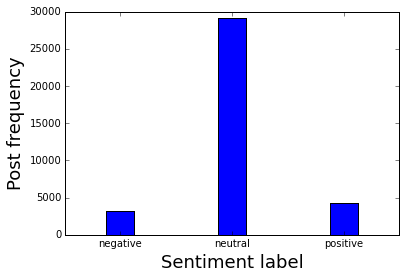

In [246]:
# tweet_sentiment_counts = tweet_sentiment_labels.value_counts()
tweet_sentiment_counts = tweet_data_filtered_df['sentiment_label'].value_counts()
xticks = pd.np.array(tweet_sentiment_counts.index)
width = 0.25
xtick_labels = ['negative', 'neutral', 'positive']
plt.bar(xticks - width / 2., tweet_sentiment_counts, width=width)
plt.xticks([-1,0,1], xtick_labels)
plt.xlabel('Sentiment label', fontsize=18)
plt.ylabel('Post frequency', fontsize=18)
plt.show()

Interesting! There are relatively few positive and negative tweets.

This could make hypothesis testing more difficult, unless we propose an alternative version where positive sentiment declines as the crisis progresses. This would be similar to the emotional contagion study which proposed both increased activation and decreased inhibition in response to emotions expressed by one's friends.

### Sanity check
Let's make sure that the tweets classified as positive are actually positive and the tweets classified as negative are actually negative.

In [249]:
sample_size = 5
positive_tweet_text = tweet_data_filtered_df[tweet_data_filtered_df['sentiment_label'] == 1]['text']
negative_tweet_text = tweet_data_filtered_df[tweet_data_filtered_df['sentiment_label'] == -1]['text']
positive_sample = pd.np.random.choice(positive_tweet_text, size=sample_size)
negative_sample = pd.np.random.choice(negative_tweet_text, size=sample_size)
print('positive sample:\n%s\n'%('\n'.join(positive_sample)))
print('negative sample:\n%s\n'%('\n'.join(negative_sample)))
print('positive tokens:\n%s\n'%('\n'.join([','.join(set(positive_lexicon) & set(TOKENIZER.tokenize(x))) for x in positive_sample])))
print('negative tokens:\n%s\n'%('\n'.join([','.join(set(negative_lexicon) & set(TOKENIZER.tokenize(x))) for x in negative_sample])))

positive sample:
RT @Obama4More: RT @SenRandPaul blocks Appointment of #SurgeonGeneral during #Ebola Crisis when @AmerMedicalAssn won't accept him as a memb…
That nurse shouldn't have flown...she knew better #Ebola #selfish
RT @BillGates: #Ebola is a short-term crisis with long-term implications. How I think it will play out: http://t.co/VFUQ0V3bCB http://t.co/…
#Ebola scare: Flight attendants and pilots seek better protections http://t.co/cejbD1S1YF
RT @MyHumanCompass: CDC head @DrFriedenCDC other famous grin guy look very similar? What are ur thoughts? #EbolaOutbreak  @fxnopinion RT ht…

negative sample:
Do you think the Americans will just pack up leave #Liberia after helping them eradicate #Ebola
RT @BBCWorld: In memory of Nigeria's "hero doctor" who first spotted #Ebola - and later died http://t.co/7nxhM2AuEm http://t.co/A7wrE7mYXo
RT @MarkSoveign: It seems that #Sequestration is every bit as dumb as we thought it would turn out to be.  #Ebola #Maddow #LastWord #GOP #G…
RT @SkyNew

Positive tweets describe obvious good outcomes, like "better" and "grin." There's a lot of negation here which suggests that we shouldn't pay as much attention to "positive" sentiment.

Negative tweets describe the relevant bad outcomes, "died" and "leave." 

### Test hypothesis
Let's start by assuming that the split point between "start" and "end" is the exact middle of the data.

In [278]:
date_fmt = '%a %b %d %H:%M:%S +0000 %Y'
tweet_data_filtered_df.loc[:, 'created_at_datetime'] = tweet_data_filtered_df.loc[:, 'created_at'].apply(lambda x: datetime.strptime(x, date_fmt))
all_dates = tweet_data_filtered_df.loc[:, 'created_at_datetime']
# get unique days, then get the median day
all_dates_unique_days = sorted(all_dates.apply(lambda x: datetime(*x.timetuple()[:3])).unique())
N = len(all_dates_unique_days)
split_point = int(N/2)
median_date = all_dates_unique_days[split_point]
print('split at date %s'%(median_date))

split at date 2014-09-27T00:00:00.000000000


In [279]:
tweet_data_before = tweet_data_filtered_df[tweet_data_filtered_df['created_at_datetime'] <= median_date]
tweet_data_after = tweet_data_filtered_df[tweet_data_filtered_df['created_at_datetime'] > median_date]

Now let's plot the distribution of sentiment before and after the split point, as a boxplot.

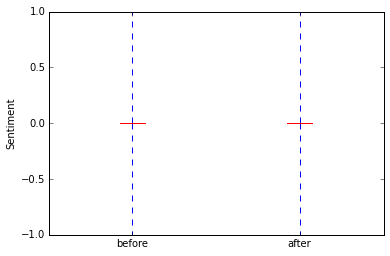

In [280]:
box_data = [tweet_data_before['sentiment_label'].values, tweet_data_after['sentiment_label'].values]
plt.boxplot(box_data, labels=['before', 'after'])
plt.ylabel('Sentiment')
plt.show()

This plot isn't too informative. What if we just look at the mean and standard deviation of sentiment?

In [281]:
from scipy.stats import ttest_ind
print('before: sentiment mean = %.3f +/- %.3f'%(tweet_data_before['sentiment_label'].mean(), tweet_data_before['sentiment_label'].std()))
print('after: sentiment mean = %.3f +/- %.3f'%(tweet_data_after['sentiment_label'].mean(), tweet_data_after['sentiment_label'].std()))
sentiment_diff = tweet_data_after['sentiment_label'].mean() - tweet_data_before['sentiment_label'].mean()
t_stat, p_val = ttest_ind(tweet_data_after['sentiment_label'], tweet_data_before['sentiment_label'])
print('mean difference in sentiment before and after split point is %3f, significant with t=%.3f and p=%.3E'%
      (sentiment_diff, t_stat, p_val))

before: sentiment mean = 0.005 +/- 0.407
after: sentiment mean = 0.031 +/- 0.457
mean difference in sentiment before and after split point is 0.025315, significant with t=3.784 and p=1.547E-04


Interesting! It looks like the average sentiment increased slightly (0.0253, p < 0.01) between the time periods.

### Update hypothesis: sentiment as a categorical variable

It might make sense to see sentiment as more of a categorical variable, meaning that we should look for a change in percentage of negative posts rather than a change in the overall distribution.

Updated hypothesis:

$H_{0}$: the proportion of negative Ebola tweets is not higher at the end of the time period observed than at the beginning of the time period observed.

$H_{1}$: the proportion of negative Ebola tweets is not higher at the end of the time period observed than at the beginning of the time period observed.

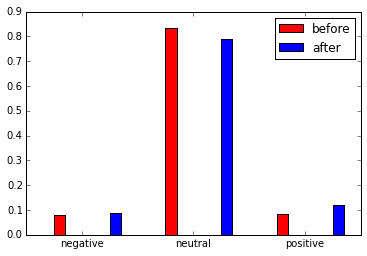

In [282]:
tweet_data_before_sentiment_pcts = tweet_data_before['sentiment_label'].value_counts() / tweet_data_before.shape[0]
tweet_data_after_sentiment_pcts = tweet_data_after['sentiment_label'].value_counts() / tweet_data_after.shape[0]
tweet_data_before_sentiment_pcts.sort_index(inplace=True)
tweet_data_after_sentiment_pcts.sort_index(inplace=True)
x_offset = 0.25
bar_width = 0.1
x_pos = pd.np.arange(len(tweet_data_after_sentiment_pcts))
x_ticklabels = ['negative', 'neutral', 'positive']
plt.bar(x_pos-x_offset, tweet_data_before_sentiment_pcts, color='r', label='before', width=bar_width)
plt.bar(x_pos+x_offset, tweet_data_after_sentiment_pcts, color='b', label='after', width=bar_width)
plt.xticks(x_pos, x_ticklabels)
plt.legend(loc='upper right')
plt.show()

It looks like the amount of positive sentiment decreased slightly and neutral sentiment increased slightly.

We should do a sampling hypothesis test to determine if the changes are significant.

In [283]:
def sentiment_label_test(all_data, split_index, sentiment_label, samples=1000):
    """
    Repeatedly shuffle the data and split to produce
    the same amount of before/after data, then
    test the null hypothesis that the randomized
    after-data has a more extreme sentiment than the before-data.
    
    Parameters:
    -----------
    all_data : pandas.Series
    split_index : int
    sentiment_label : int
    samples : int
    
    Returns:
    --------
    p_val : float
    Proportion of null hypothesis tests that succeeded.
    """
    pct_diff = lambda samp : (len(samp[split_index:][samp[split_index:]==sentiment_label]) / len(samp[split_index:]) - 
                              len(samp[:split_index][samp[:split_index]==sentiment_label]) / len(samp[:split_index]))
#     get_samp = lambda data: data.sample(frac=1, replace=False).reset_index(drop=True)
    get_samp = lambda data: data[pd.np.random.choice(range(len(data)), size=len(data), replace=False)]
    h1_val = pct_diff(all_data)
    h0_vals = [pct_diff(get_samp(all_data)) for _ in range(samples)]
    if(h1_val < 0):
        p_val = sum([h0 < h1_val for h0 in h0_vals]) / samples
    elif(h1_val > 0):
        p_val = sum([h0 > h1_val for h0 in h0_vals]) / samples
    return p_val

In [284]:
samples = 1000
sentiment_labels_unique = tweet_data_filtered_df['sentiment_label'].unique()
pct_diff = lambda samp : (len(samp[split_index:][samp[split_index:]==sentiment_label]) / len(samp[split_index:]) - 
                          len(samp[:split_index][samp[:split_index]==sentiment_label]) / len(samp[:split_index]))
sentiment_label_values = tweet_data_filtered_df['sentiment_label'].values
split_index = pd.np.where(tweet_data_filtered_df['created_at_datetime'] > median_date)[0][0]
for sentiment_label in sentiment_labels_unique:
    test_p_val = sentiment_label_test(sentiment_label_values, split_index, sentiment_label, samples=samples)
    before_after_diff = pct_diff(sentiment_label_values)
    print('for sentiment label %d after-before difference %.3E is significant with p-value %.3E'%
          (sentiment_label, before_after_diff, test_p_val))

for sentiment label 0 after-before difference -6.115E-02 is significant with p-value 0.000E+00
for sentiment label 1 after-before difference 5.980E-02 is significant with p-value 0.000E+00
for sentiment label -1 after-before difference 1.349E-03 is significant with p-value 4.290E-01


The increase in negative sentiment is small (0.135%) and only weakly significant (0.01 < p < 0.05), and it's actually a decrease.

Interestingly, the positive sentiment increased by more than an order of 10 greater than negative sentiment (5.98%, p < 0.001), which was not expected. 

The apparent increase in sentiment may be due to the negation problem observed earlier, where "more positive" really just means more more phrases containing negation of positive words (e.g., "no support").

**Conclusion**:

We can reject the null hypothesis with 95% confidence that the proportion of negative sentiment did not increase from the start to the end of the time period observed. 

We can also reject a new hypothesis with more than 99% confidence that positive sentiment did not increase from the start to the end of the time period observed, because we observe a significant increase in proportion of tweets with positive sentiment.

## Better hypothesis test: increase over time
Instead of using a simple two-population hypothesis test to test the increase in negative sentiment, we should really frame this as a time series analysis, where the metric of interest is the change in negative sentiment per day.

### Compute daily negative percentage
Compute the per-day proportion of tweets containing negative sentiment.

In [289]:
# round date to day-of
day_round = lambda x: datetime(*x.timetuple()[:3])
datetime_day = tweet_data_filtered_df.loc[:, 'created_at_datetime'].apply(day_round)
tweet_data_filtered_df = tweet_data_filtered_df.assign(created_at_datetime_day=datetime_day)
# tweet_data_filtered_df.loc[:, 'created_at_datetime_day'] = tweet_data_filtered_df.loc[:, 'created_at_datetime'].apply(day_round)
sentiment_label = -1
compute_daily_sentiment = lambda x: x[x['sentiment_label'] == sentiment_label].shape[0] / x.shape[0]
per_day_negative_sentiment_pct = tweet_data_filtered_df.groupby('created_at_datetime_day').apply(compute_daily_sentiment)

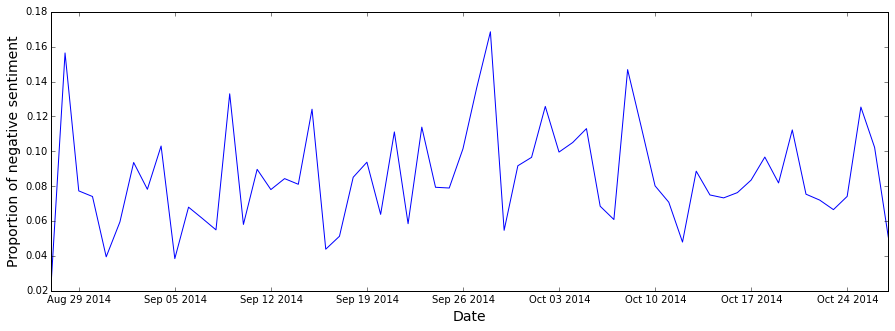

In [290]:
# plot
plt.figure(figsize=(15,5))
plt.plot(per_day_negative_sentiment_pct.index, per_day_negative_sentiment_pct)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Proportion of negative sentiment', fontsize=14)
plt.show()

It looks like a stationary process to me, meaning that any "change" observed is the result of regular fluctuation. 

We can test this null hypothesis using the agumented Dickey-Fuller test ([Dickey and Fuller 1979](http://www.jstor.org/stable/2286348)), which tests the null hypothesis that a time series is generated by a unit root. We model the sentiment time series $y$ as follows: 

$$y_{t} = \alpha + \beta{}t + \gamma y_{t-1} + \epsilon_{t} + \sum_{i=1}^{p-1} \delta_{p}\Delta{}y_{t-i}$$

The key here is the lag coefficient $\gamma$, which determines how much of the time series value at time $t$ is explained by the time series value at the previous timestep $t-1$. 

We are interested in knowing whether the time series can be explained as a process of constant growth or decline with a unit root (i.e., $\gamma=0$). We therefore fit an autoregressive regression model to the data using the equation above and use the following test statistic to determine whether the lag coefficient is significantly different from 0:

$$ t = \frac{\hat{\gamma} - 0}{SE(\hat{\gamma})} $$

If the test statistic is more negative than a critical value, we can reject the null hypothesis that $\gamma=0$ and therefore reject the hypothesis that a unit root exists.

In [309]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(per_day_negative_sentiment_pct)
print(test_result)
print('the test statistic for the augmented Dickey-Fuller test is %.3f, p=%.3E'%(test_result[0], test_result[1]))

(-8.3733223003432098, 2.6263558061018832e-13, 0, 61, {'1%': -3.5424127466616149, '5%': -2.9102362358082838, '10%': -2.5927445767266866}, -214.82385148248238)
the test statistic for the augmented Dickey-Fuller test is -8.373, p=2.626E-13


We therefore reject the possibility that the negative sentiment time series has a unit root and assume that the series is stationary, i.e. no noticeable growth or decline trend.

### Discussion

We find a slight decrease in both negative and positive sentiment over time. At first glance this is surprising because one would expect that the increased deaths over time due to Ebola (Dixon, Schafer 2014) would engender more negative sentiment shared around the topic on social media. However, it may be the case that the growing awareness of the Ebola outbreak over time led to discussion among a wider audience that engendered more neutral statements (explaining the increase in proportion of neutral statements).

This study may be refined through a more careful sentiment extraction scheme that accounts for negation. It would also be interesting to use a sentiment lexicon that does not include words like "death" and "dying" to see if the same results hold: I suspect that a large proportion of the "negative" Ebola tweets are simply reporting the facts about the death rates, while the more interesting negative sentiment tweets would contain more subjective language such as "sad" and "devastating." Lastly, we did not use a weighted lexicon which could reveal more variation within the positive and negative tweets, such that even if negative sentiment remains steady over time the average weight of the negative sentiment might still grow. 

Furthermore, this study looked at sentiment across time but could have benefited from further population segmentation. For instance, did tweets originating from countries closer to the Ebola outbreak exhibit more negative sentiment? I would expect this to be true simply because fears of contagion would seem to be stronger among populations closer to the Ebola outbreak.

### References
Dickey, D. A., & Fuller, W. A. (1979). Distribution of the estimators for autoregressive time series with a unit root. Journal of the American statistical association, 74(366a), 427-431.

Dixon, M. G., & Schafer, I. J. (2014). Ebola viral disease outbreak—West Africa, 2014. MMWR Morb Mortal Wkly Rep, 63(25), 548-51.

Imran, M., Castillo, C., Diaz, F., & Vieweg, S. (2015). Processing social media messages in mass emergency: A survey. ACM Computing Surveys (CSUR), 47(4), 67.

Thelwall, M., Buckley, K., & Paltoglou, G. (2011). Sentiment in Twitter events. Journal of the Association for Information Science and Technology, 62(2), 406-418.